In [17]:
# Importing the libraries we will need

# Importing the pandas library
#
import pandas as pd

# Importing the numpy library
#
import numpy as np
import matplotlib.pyplot as plt

1.DATA LOADING

In [4]:
f = r'stroke_data.csv'
df1= pd.read_csv(f)
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


2. DATA INSPECTION

In [9]:
#non null count - number of cells in each column
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
import pandas as pd
#convert age column from float to int
df1['age'] = df1['age'].astype('int64')


In [6]:
#checking for inconsistencies
df1['stroke'].tail()

5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, dtype: int64

In [7]:
df1['stroke'].head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [11]:
#IDENTIFYING COLUMN NAMES AND DATA TYPES
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df1.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

DATA CLEANING

In [11]:
#check for duplicates
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [26]:
#check for missing values
df1.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

there is 201 missing values in bmi 

In [28]:
# checking the boolen Series for the values in the `bmi` column
df1['bmi'].isna()


0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [31]:
#identifying  the empty rows in the bmi columns
df1.loc[df1['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,No
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,No
13,8213,Male,78,0,1,Yes,Private,Urban,219.84,NaN,Unknown,No
19,25226,Male,57,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,No
27,61843,Male,58,0,0,Yes,Private,Rural,189.84,NaN,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41,0,0,No,Private,Rural,70.15,NaN,formerly smoked,No
5048,28788,Male,40,0,0,Yes,Private,Urban,191.15,NaN,smokes,No
5093,32235,Female,45,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,No
5099,7293,Male,40,0,0,Yes,Private,Rural,83.94,NaN,smokes,No


In [34]:
#handling our missing values in the bmi column
# removing empty rows
df1.dropna(inplace=True)


In [36]:
#check if missing rows have been removed
df1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
HANDLING OUTLIERS

In [22]:
#descibe the statistics for numerical columns
df1.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
'bmi','avg_glucose_level','age','hypertension','heart_disease'

<function matplotlib.pyplot.show(close=None, block=None)>

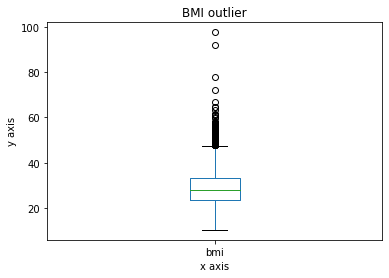

In [43]:
import matplotlib.pyplot as plt
#box plot for bmi column
df1.boxplot(column =['bmi'], grid = False)
plt.title("BMI outlier")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show

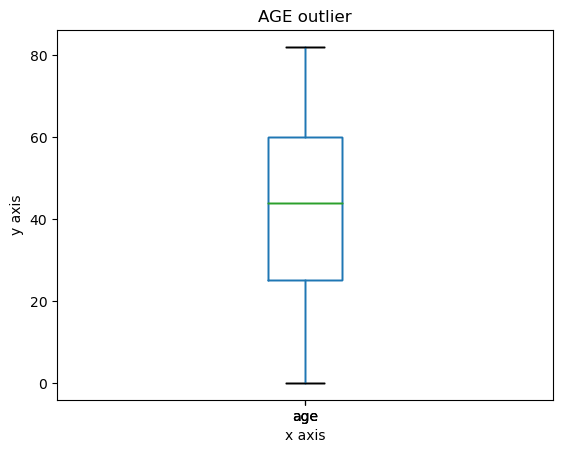

In [48]:
import matplotlib.pyplot as plt
#box plot for age column
df1.boxplot(column =['age'], grid = False)
plt.title("AGE outlier")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

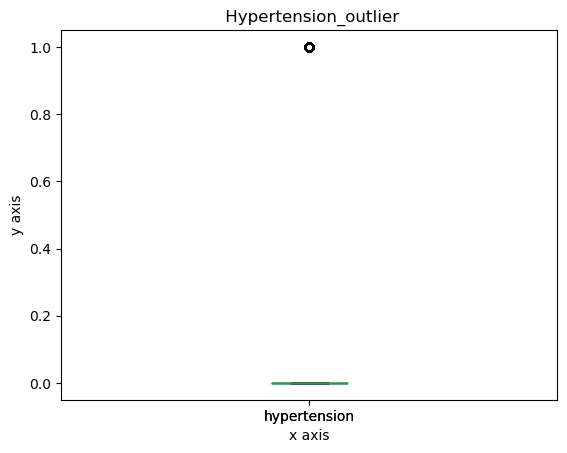

In [50]:
#box plot for hypertension column
df1.boxplot(column =['hypertension'], grid = False)
plt.title(" Hypertension_outlier")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

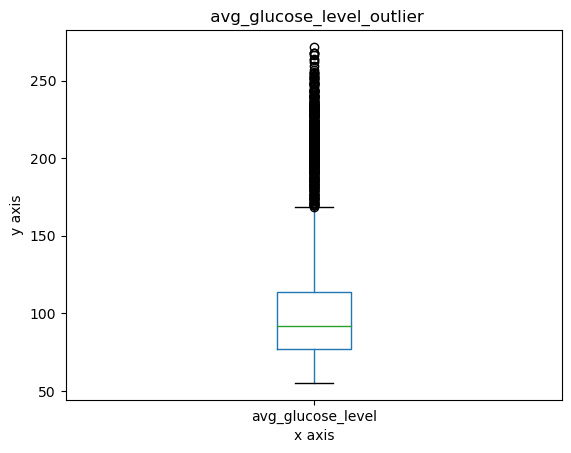

In [51]:
#box plot for avg_glucose_level column
df1.boxplot(column =['avg_glucose_level'], grid = False)
plt.title(" avg_glucose_level_outlier")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

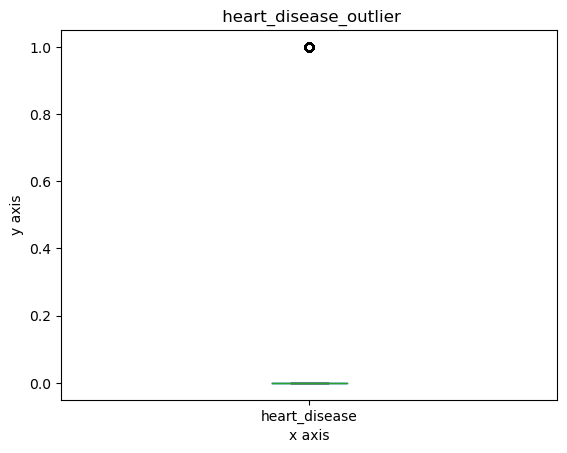

In [52]:
#box plot for heart_disease column
df1.boxplot(column =['heart_disease'], grid = False)
plt.title(" heart_disease_outlier")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

In [54]:
#fill in the missing values with zero
df1.fillna(value=0, inplace = True)

In [55]:
#confirm missing values were filled
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   int64  
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 627.6+ KB


In [57]:
df2 = df1.copy()

In [62]:
#removing outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

#removing outliers
df2 = df1[~((df1<(Q1 -1.5 * IQR))| (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

print("old shape:","\n",df1.shape)
print("****"*10)
print("new shape:","\n", df2.shape)

old shape: 
 (5110, 12)
****************************************
new shape: 
 (3759, 12)


<function matplotlib.pyplot.show(close=None, block=None)>

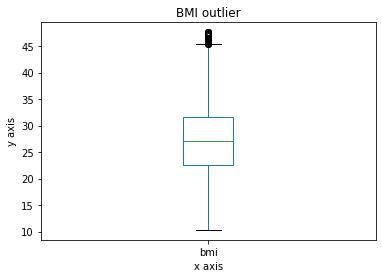

In [65]:
df2.boxplot(column =['bmi'], grid = False)
plt.title("BMI outlier")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show

In [67]:
#check for missing values
df2.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,False,False,False,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False,False,False,False
252,False,False,False,False,False,False,False,False,False,False,False,False
253,False,False,False,False,False,False,False,False,False,False,False,False
255,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,False,False,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
GENERATE DESCRIPTIVE STATISTICS FOR EACH COLUMNS

In [58]:
df2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.854145,0.091872,0.049501,105.305150,28.893237
std,20995.098457,22.575986,0.288875,0.216934,44.424341,7.854067
min,77.000000,0.000000,0.000000,0.000000,55.120000,10.300000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000


In [72]:
df2.mean()

id                   37060.585528
age                     37.562511
hypertension             0.000000
heart_disease            0.000000
avg_glucose_level       91.490128
bmi                     27.464698
stroke                   0.000000
dtype: float64

In [74]:
df2.median()

id                   37655.00
age                     38.00
hypertension             0.00
heart_disease            0.00
avg_glucose_level       87.92
bmi                     27.00
stroke                   0.00
dtype: float64

In [75]:
df2.mode()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,77,Female,45.0,0.0,0.0,Yes,Private,Urban,93.88,28.7,never smoked,0.0
1,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3754,72861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3755,72867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3756,72882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3757,72914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#irrelevant
df2.drop(columns = 'id') 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,No
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,No
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,No
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,No
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,No
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,No
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [87]:
df2.skew()

age                  0.105197
hypertension         0.000000
heart_disease        0.000000
avg_glucose_level    0.836902
bmi                  0.397064
stroke               0.000000
dtype: float64

EXPLORE THE DISTRIBUTION OF AGE,BMI,AVG_GLUCOSE LEVEL

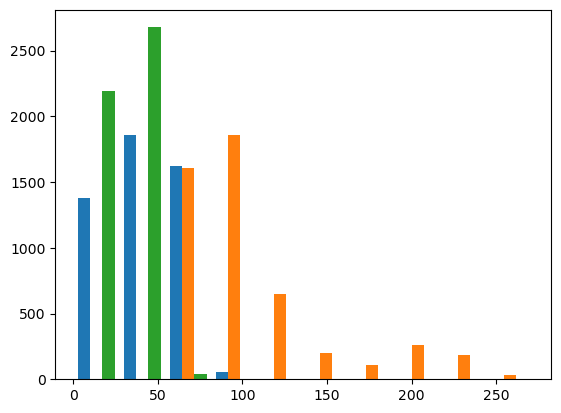

In [61]:
#univariate analysis of age,avg_glucose_level and bmi
plt.hist(df2[['age', 'avg_glucose_level', 'bmi']])
# plt.legend()
# plt.figsize(23, 9)
plt.show()

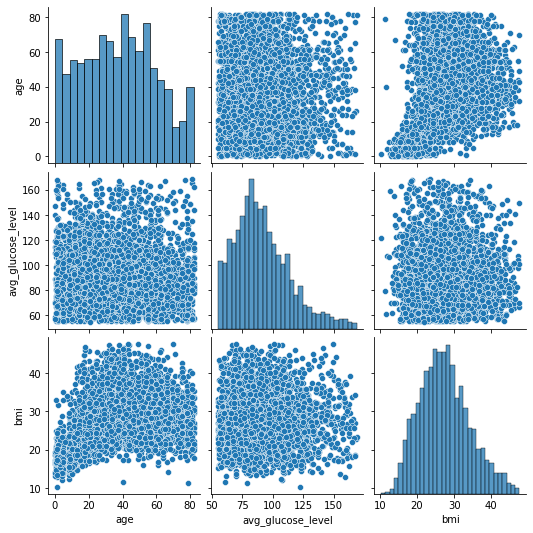

In [117]:
#Exploring the distribution of age, avg_glucose_level and bmi
sns.pairplot(data=df2,vars=['age','avg_glucose_level','bmi'])
plt.show()

In [62]:
df2[['age', 'avg_glucose_level', 'bmi']].hist(figsize = (16, 9))#.describe()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)